**To keep in mind:**

O. Okike, J. A. Alhassan, E. U. Iyida and A. E. Chukwude. A comparison of catalogues of Forbush decreases identified from individual and a network of neutron monitors: a critical perspective. MNRAS 503, 5675–5691 (2021) doi:10.1093/mnras/stab680.  

For the purpose of a comparative study of two FD catalogues and subsequent analysis: 
- The FD catalogue of the Russian investigators (Belov et al. 2018a) was downloaded from http://spaceweather.izmiran.ru/eng/dbs.html. It is the most comprehensive and up to date Forbush event catalogue. Several CR investigators have employed the catalogue. Some of the publications based on the IZMIRAN FD list are displayed at http://spaceweather.izmiran.ru/eng/papers.html. Belov (2008) asserts that the list is more accurate, as it was selected using several CR physical characteristics (e.g. density and anisotropy).
- The FD catalogue of Lockwood is sourced from https://ngdc.noaa.gov/stp/space-weather/interplanetary-data/cosmic-rays/forbush-decreases/. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import io, re, glob
import urllib.request
import math

In [2]:
alld=[]
for i in sorted(glob.glob("Data2/nmdb*_all_stations.csv")):
    dat=pd.read_csv(i)
    dat=dat.drop(columns=["Unnamed: 0"])
    dat["DATETIME"]=pd.to_datetime(dat["DATETIME"], format='mixed', utc=True)
    dat.set_index("DATETIME",inplace=True)
    #dat=dat.sort_values(by="DATETIME")
    dat[dat=='   null']=np.nan
    for j in dat.columns:
        dat[j]=pd.to_numeric(dat[j],errors='coerce')
    #print(dat.info())
    alld.append(dat)
df=pd.concat(alld,axis=0)

/var/folders/8n/h_rtmhz56bd84hgb5_cp68fc0000gn/T/ipykernel_6834/3860649062.py:3: DtypeWarning: Columns (2,3,5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dat=pd.read_csv(i)
/var/folders/8n/h_rtmhz56bd84hgb5_cp68fc0000gn/T/ipykernel_6834/3860649062.py:3: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dat=pd.read_csv(i)
/var/folders/8n/h_rtmhz56bd84hgb5_cp68fc0000gn/T/ipykernel_6834/3860649062.py:3: DtypeWarning: Columns (2,3,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dat=pd.read_csv(i)
/var/folders/8n/h_rtmhz56bd84hgb5_cp68fc0000gn/T/ipykernel_6834/3860649062.py:3: DtypeWarning: Columns (2,3,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dat=pd.read_csv(i)
/var/folders/8n/h_rtmhz56bd84hgb5_cp68fc0000gn/T/ipykernel_6834/3860649062.py:3: DtypeWarning: Columns (2,3,5,6,8,9) have mixed types. Specify dtype o

In [3]:
df=df.drop_duplicates()
df=df[df.index>="2018"]

In [4]:
df.describe()

,DOMB,DOMC,MRNY,INVK,APTY,AATB,AATA,ROME
count,1.769295e+06,2.036980e+06,0.0,2.050763e+06,2.072743e+06,1.980225e+06,689700.000000,1.943182e+06
mean,5.073432e+00,1.907275e+01,NaN,1.908711e+02,1.724930e+02,1.346982e+03,58.334043,1.248172e+02
std,6.020519e-01,2.182079e+00,NaN,1.405725e+01,1.156669e+01,8.010706e+01,14.572036,4.938939e+02
min,2.734000e+00,6.250000e+00,NaN,5.310000e+01,1.237920e+02,1.030200e+03,0.050000,0.000000e+00
25%,4.534000e+00,1.689400e+01,NaN,1.781750e+02,1.615430e+02,1.275350e+03,61.460000,1.212330e+02
50%,5.196000e+00,2.000400e+01,NaN,1.979100e+02,1.779850e+02,1.369300e+03,62.750000,1.260000e+02
75%,5.588000e+00,2.091700e+01,NaN,2.017300e+02,1.821630e+02,1.420300e+03,63.780000,1.281000e+02
max,1.160300e+01,2.555300e+01,NaN,6.015780e+03,2.012400e+02,1.548750e+03,109.900000,4.435130e+05


In [5]:
for i in df.columns:
    df.loc[df[i]>(df.describe()[i].loc["mean"]+3*df.describe()[i].loc["std"]),i]=np.nan
    df.loc[df[i]<(df.describe()[i].loc["mean"]-3*df.describe()[i].loc["std"]),i]=np.nan

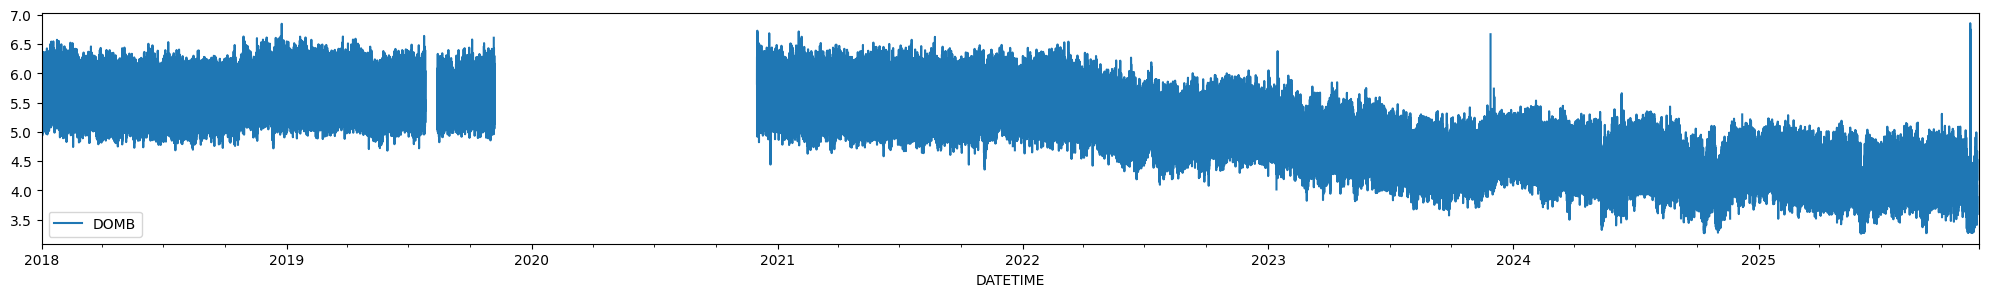

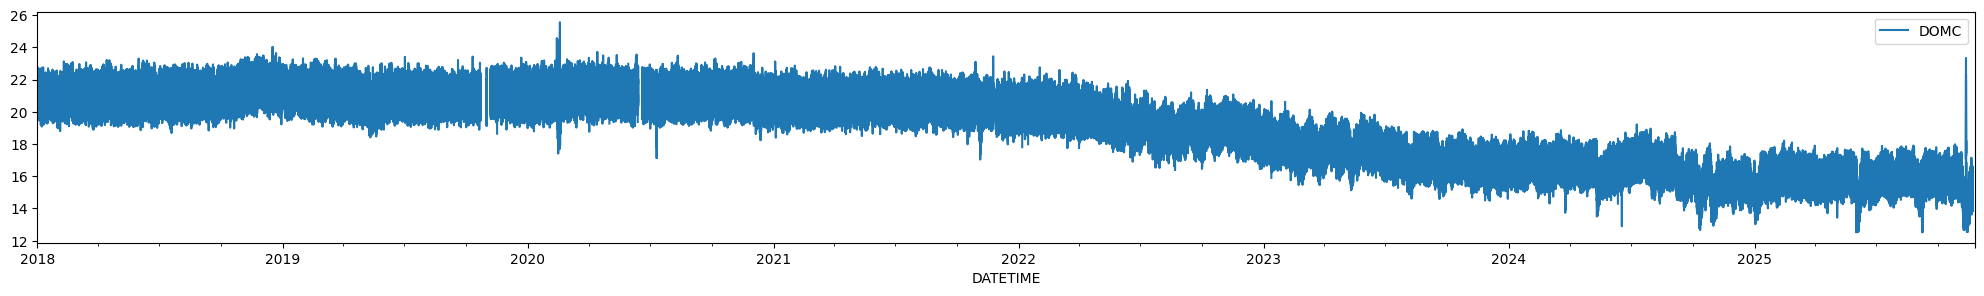

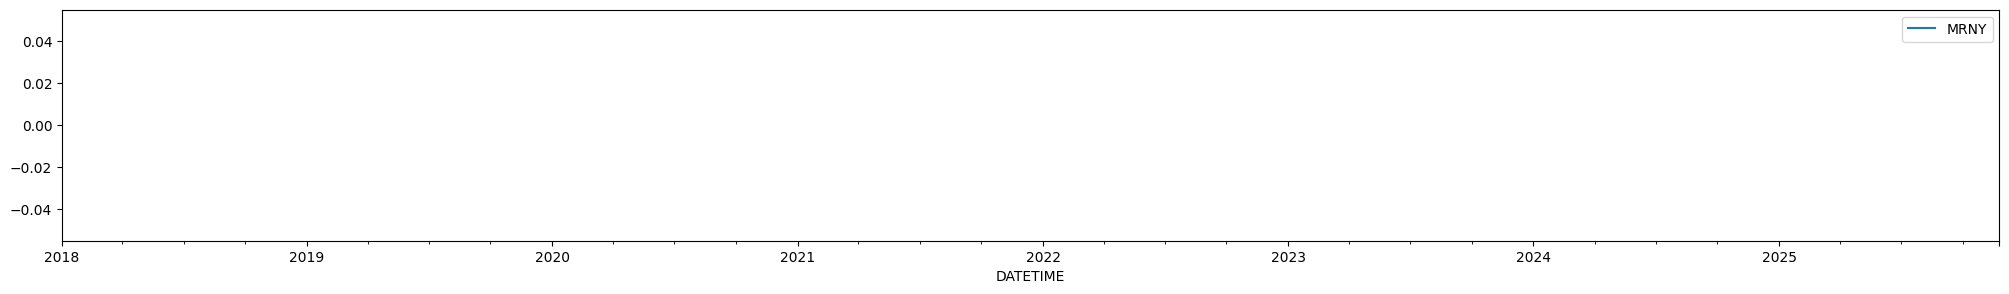

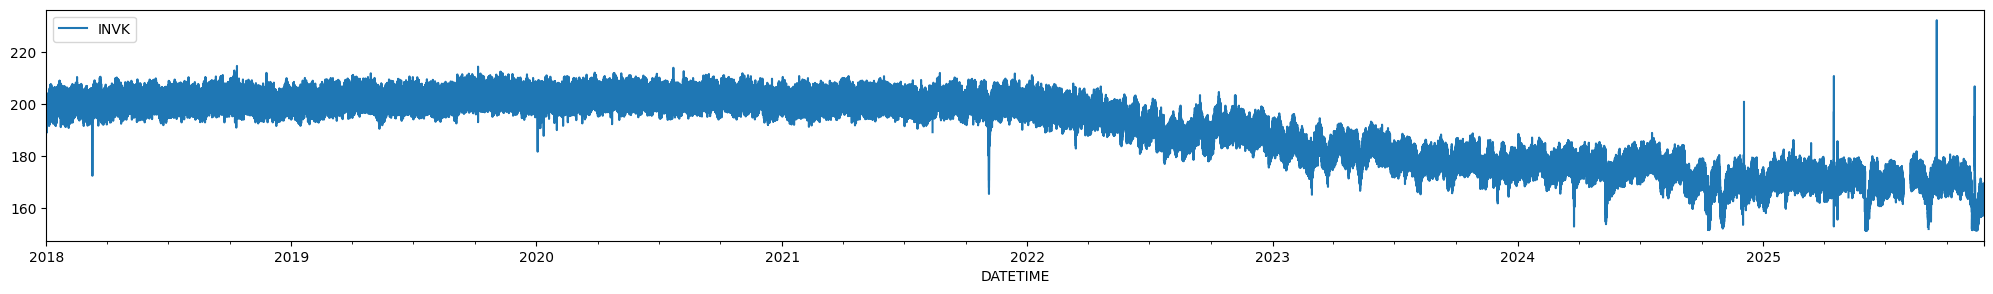

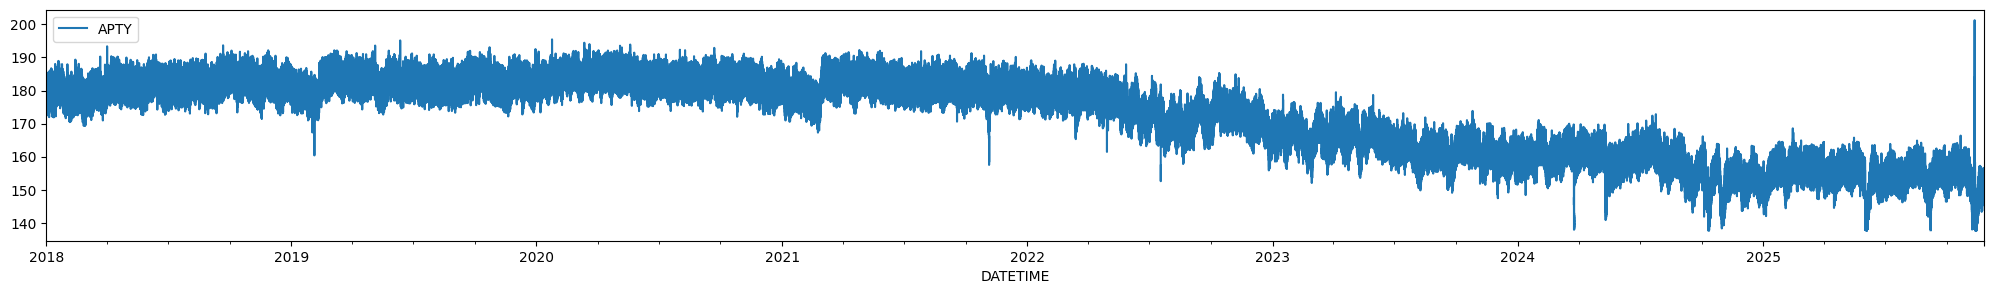

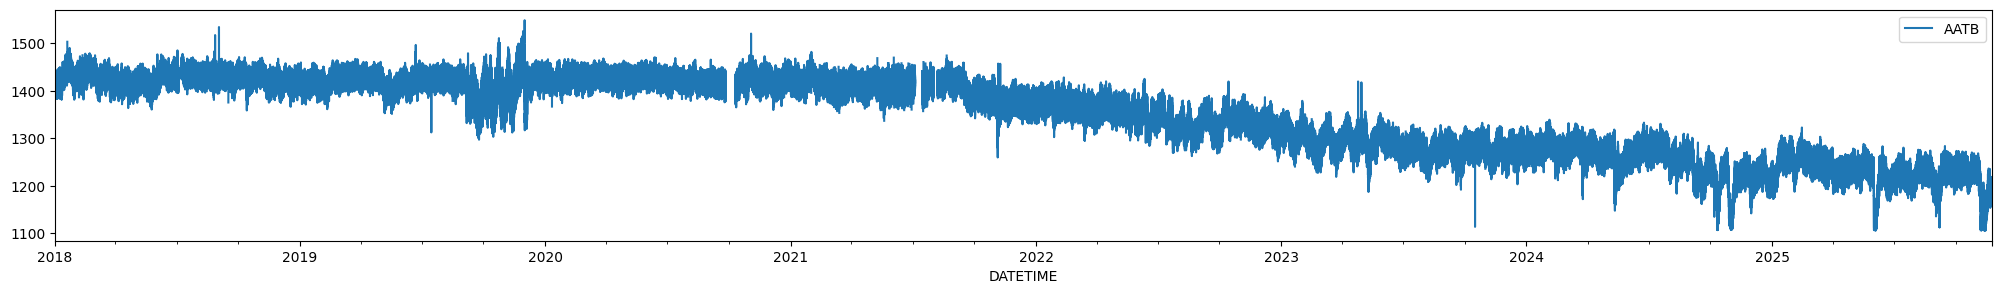

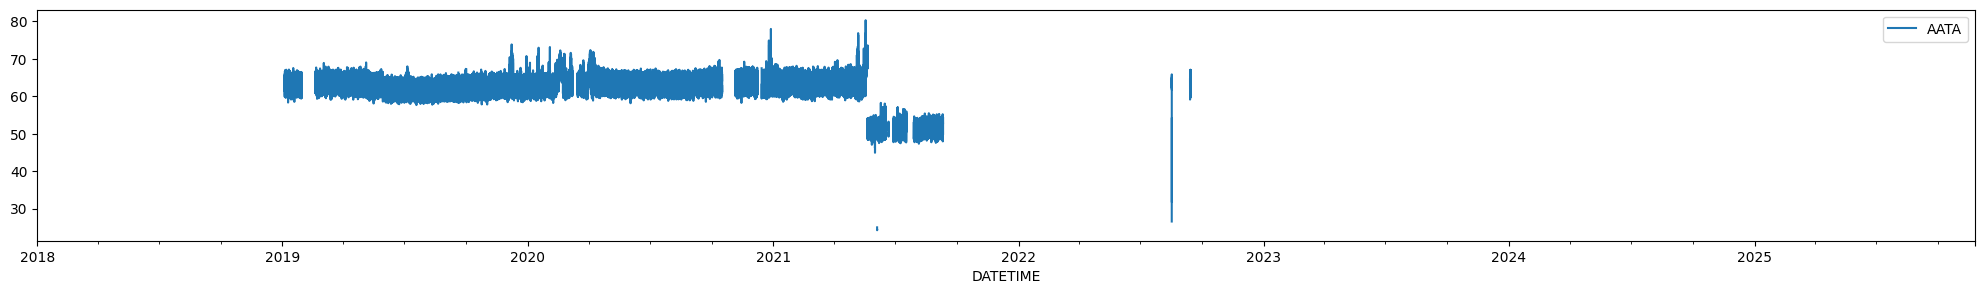

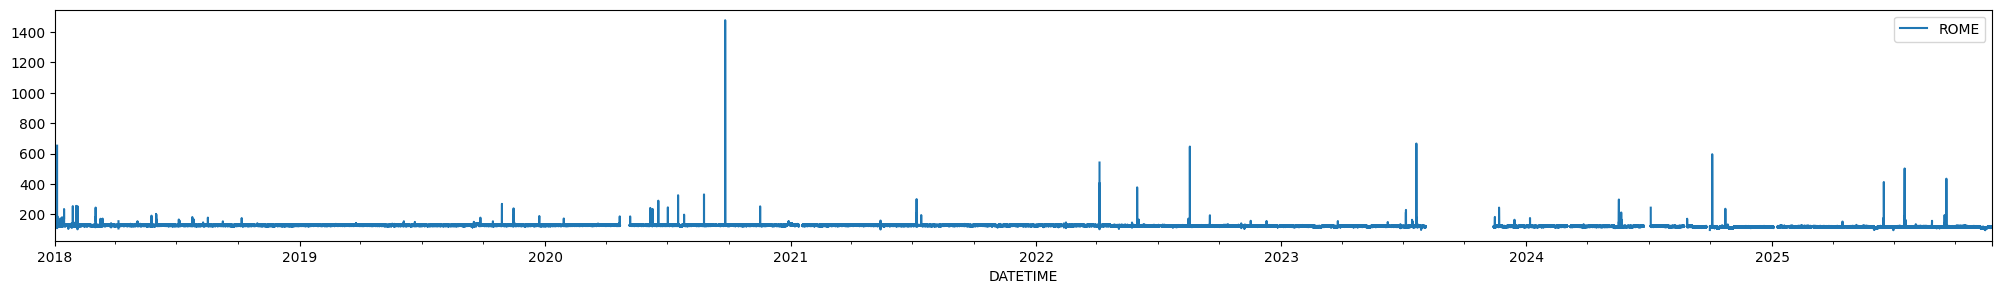

In [6]:
for i in df.columns:
    df[i].plot(figsize=(25,3))
    plt.legend()
    plt.show()

In [7]:
df.loc[df["DOMC"]>24,"DOMC"]=np.nan
df.loc[df["INVK"]>212,"INVK"]=np.nan
df.loc[df["APTY"]>195,"APTY"]=np.nan
df.loc[df["AATB"]>1500,"AATB"]=np.nan

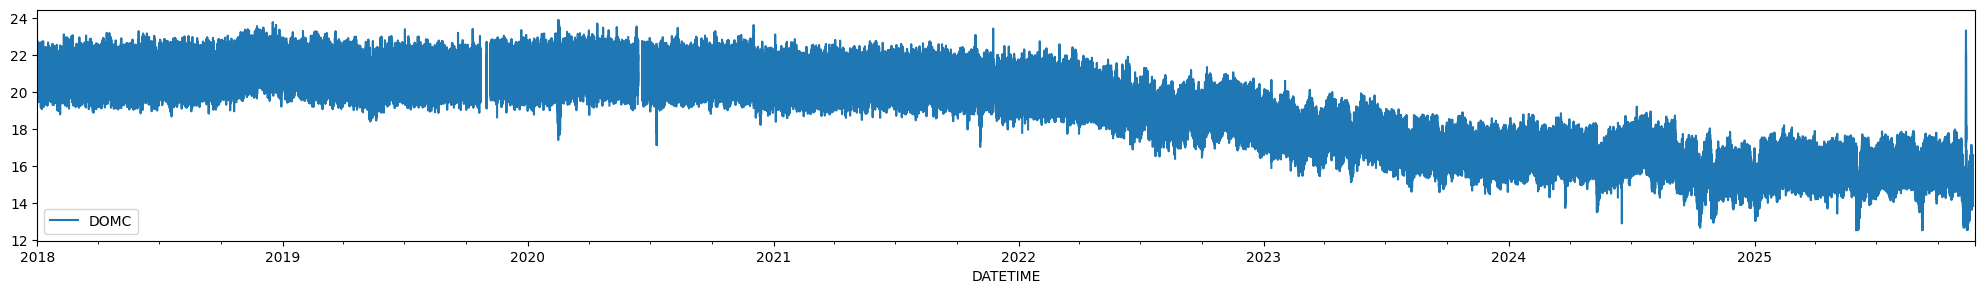

In [8]:
df["DOMC"].plot(figsize=(25,3))
plt.legend()
plt.show()

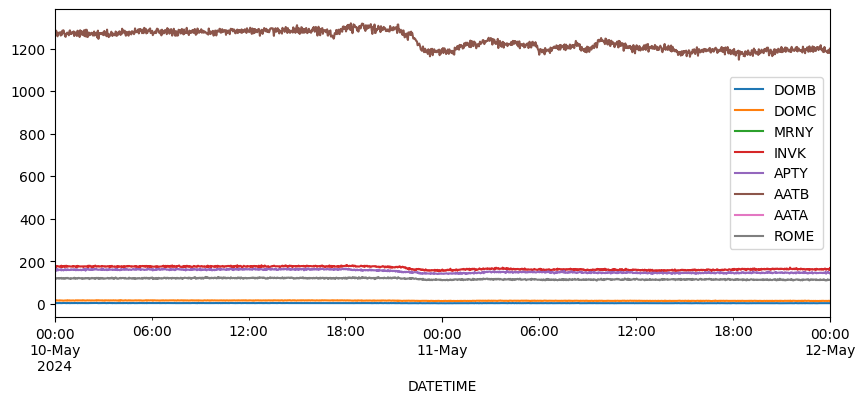

In [9]:
df[(df.index>="2024-05-10")&(df.index<="2024-05-12")].plot(figsize=(10,4))
plt.show()

In [10]:
df[["DOMC","INVK","APTY","AATB"]].to_csv("Data2/DataStudy2.csv",index=True)